In [1]:
#Find the releative path of Lib folder
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [3]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from Lib.BEM_Solver.BEM_2D import * 
from Lib.Domain_Decomposition.Coupling_Main import *
from Lib.Tools.Geometry import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


We have trace
Total DOF= 55


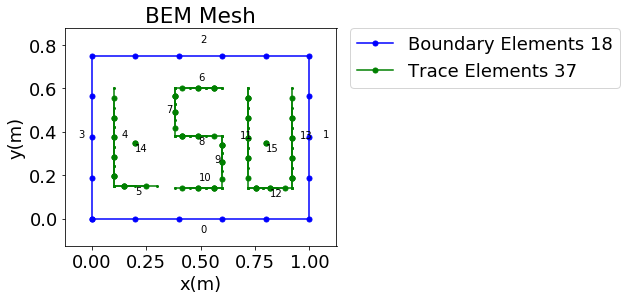

[Mesh] State
Number of boundary elements:30
Edge Num.:4
# Neumann-1   Dirichlet-0
(E)Pts	X	Y	Type	Marker		BC_type		BC_value
(1)1	0.100	0.000	Cons	0		1		0.000
(2)2	0.300	0.000	Cons	0		1		0.000
(3)3	0.500	0.000	Cons	0		1		0.000
(4)4	0.700	0.000	Cons	0		1		0.000
(5)5	0.900	0.000	Cons	0		1		0.000
(6)6	1.000	0.094	Cons	1		1		0.000
(7)7	1.000	0.281	Cons	1		1		0.000
(8)8	1.000	0.469	Cons	1		1		0.000
(9)9	1.000	0.656	Cons	1		1		0.000
(10)10	0.900	0.750	Cons	2		1		0.000
(11)11	0.700	0.750	Cons	2		1		0.000
(12)12	0.500	0.750	Cons	2		1		0.000
(13)13	0.300	0.750	Cons	2		1		0.000
(14)14	0.100	0.750	Cons	2		1		0.000
(15)15	0.000	0.656	Cons	3		1		0.000
(16)16	0.000	0.469	Cons	3		1		0.000
(17)17	0.000	0.281	Cons	3		1		0.000
(18)18	0.000	0.094	Cons	3		1		0.000
Trace Num.:12
--Trace  1
(19)19	0.100	0.195	Cons	4		0		50.000
(20)20	0.100	0.285	Cons	4		0		50.000
(21)21	0.100	0.375	Cons	4		0		50.000
(22)22	0.100	0.465	Cons	4		0		50.000
(23)23	0.100	0.555	Cons	4		0		50.000
--Trace  2
(24)24	0.150	0.150	Cons	5

In [4]:
BEM_Case1=BEM2D()

#1.Build Mesh
Boundary_vert=[(0.0, 0.0), (1.0, 0.0), (1.0, 0.75), (0.0, 0.75)] #Anti-clock wise for internal domain

Trace_vert=[]
L=[((0.1, 0.15), (0.1, 0.6)),((0.1, 0.15), (0.3, 0.15))]
S=[((0.6,0.6),(0.38,0.6)),((0.38,0.6),(0.38,0.38)),((0.38,0.38),(0.6,0.38)),((0.6,0.38),(0.6,0.14)),((0.6,0.14),(0.38,0.14))]
U= [((0.72,0.6),(0.72,0.14)),((0.72,0.14),(0.92,0.14)),((0.92,0.14),(0.92,0.6))]
Well= [((0.195,0.35),(0.205,0.35)),
      ((0.795,0.35),(0.805,0.35))]
Trace_vert=L+S+U+Well
element_esize=0.2 #Edge mesh is important to overall mass balance
element_tszie=0.1

BEM_Case1.set_Mesh(Boundary_vert,Trace_vert,element_esize,element_tszie,Type="Const")

#2.Set Boundary condition
bc0=[(4,50),(5,50),(11,50),(12,50),(13,50),(14,10),(15,10)]
bc1=[(6,-100),(7,-100),(8,-100),(9,-100),(10,-100)]
BEM_Case1.set_BoundaryCondition(DirichletBC=bc0,NeumannBC=bc1)
BEM_Case1.print_debug()

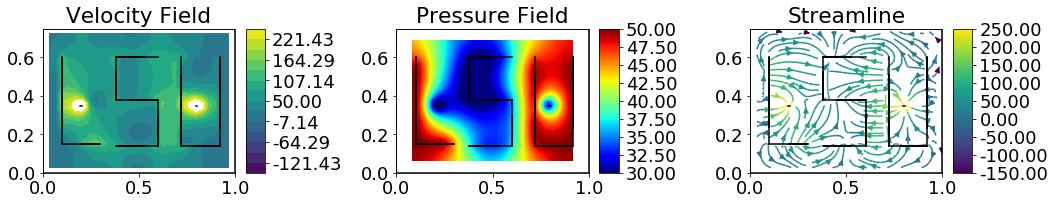

In [5]:
#3. Solve and plot
Mat=BEM_Case1.Solve()
#BEM_Case1.print_solution()

PUV=BEM_Case1.plot_Solution(v_range=(-150,250),p_range=(30,50),resolution=30)
#PUV2=BEM_Case1.plot_SolutionBD()

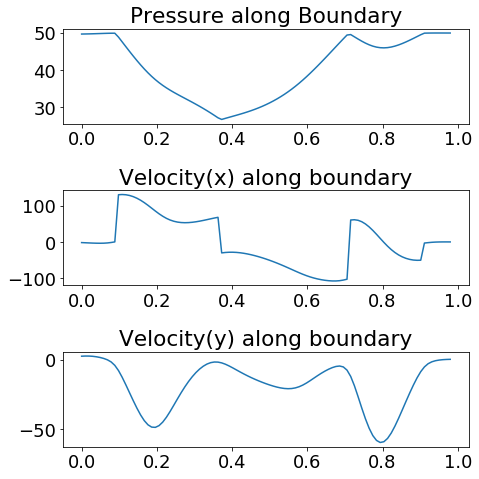

In [4]:
XY=BEM_Case1.plot_Solution_overline((0.01,0.45),(0.99,0.45))

In [ ]:
for i in range(len(XY[0])):
    print(0.01+XY[0][i],' ',0.45)

In [ ]:
p=XY[1][:, 1]
for i in range(len(p)):
    print(p[i])

In [6]:
A,b,HEE,HET,HTE,HTT,GEE,GET,GTE,GTT=Mat

(36, 36) (36, 35)
(35, 36) (35, 35)
(36, 36) (36, 35)
(35, 36) (35, 35)


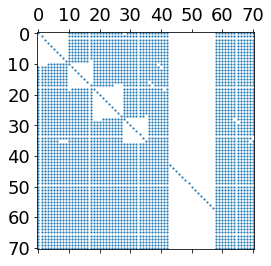

In [9]:
import matplotlib.pyplot as plt

print(np.shape(HEE),np.shape(GET))
print(np.shape(HTE),np.shape(GTT))
print(np.shape(GEE),np.shape(HET))
print(np.shape(GTE),np.shape(HTT))
plt.spy(A,precision=0.01, markersize=1)
plt.show()